In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
df = pd.read_csv('/Users/anapeyra/Desktop/NUCLIO/Entregables/TFM/stock-prediction-dsmarket/data_dsmarket/interim/full_df_gb_date.csv')

In [3]:
df.head()

,Unnamed: 0,id,item,category,department,store,store_code,region,date,year_week,month,year,units,sell_price,revenue
0,0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2011-01-29,2011-04,January,2011,0,NaN,NaN
1,1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2011-01-29,2011-04,January,2011,0,NaN,NaN
2,2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2011-01-29,2011-04,January,2011,0,NaN,NaN
3,3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2011-01-29,2011-04,January,2011,0,NaN,NaN
4,4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2011-01-29,2011-04,January,2011,0,NaN,NaN


In [4]:
df.shape

(58327370, 15)

In [5]:
df.isnull().sum()

Unnamed: 0           0
id                   0
item                 0
category             0
department           0
store                0
store_code           0
region               0
date                 0
year_week            0
month                0
year                 0
units                0
sell_price    20908674
revenue       20908674
dtype: int64

In [6]:
columnas = df.columns
print(columnas)

Index(['Unnamed: 0', 'id', 'item', 'category', 'department', 'store',
       'store_code', 'region', 'date', 'year_week', 'month', 'year', 'units',
       'sell_price', 'revenue'],
      dtype='object')


In [7]:
df.sample(n=10, axis=1)

,Unnamed: 0,id,store_code,year_week,region,category,revenue,item,store,units
0,0,ACCESORIES_1_001_NYC_1,NYC_1,2011-04,New York,ACCESORIES,NaN,ACCESORIES_1_001,Greenwich_Village,0
1,1,ACCESORIES_1_002_NYC_1,NYC_1,2011-04,New York,ACCESORIES,NaN,ACCESORIES_1_002,Greenwich_Village,0
2,2,ACCESORIES_1_003_NYC_1,NYC_1,2011-04,New York,ACCESORIES,NaN,ACCESORIES_1_003,Greenwich_Village,0
3,3,ACCESORIES_1_004_NYC_1,NYC_1,2011-04,New York,ACCESORIES,NaN,ACCESORIES_1_004,Greenwich_Village,0
4,4,ACCESORIES_1_005_NYC_1,NYC_1,2011-04,New York,ACCESORIES,NaN,ACCESORIES_1_005,Greenwich_Village,0
...,...,...,...,...,...,...,...,...,...,...
58327365,58327365,SUPERMARKET_3_823_PHI_3,PHI_3,2016-16,Philadelphia,SUPERMARKET,3.58,SUPERMARKET_3_823,Queen_Village,1
58327366,58327366,SUPERMARKET_3_824_PHI_3,PHI_3,2016-16,Philadelphia,SUPERMARKET,0.00,SUPERMARKET_3_824,Queen_Village,0
58327367,58327367,SUPERMARKET_3_825_PHI_3,PHI_3,2016-16,Philadelphia,SUPERMARKET,0.00,SUPERMARKET_3_825,Queen_Village,0
58327368,58327368,SUPERMARKET_3_826_PHI_3,PHI_3,2016-16,Philadelphia,SUPERMARKET,4.62,SUPERMARKET_3_826,Queen_Village,3


In [8]:
df['region'].value_counts()

region
New York        23330948
Boston          17498211
Philadelphia    17498211
Name: count, dtype: int64

In [9]:
df['category'].value_counts()

category
SUPERMARKET      27489810
HOME_&_GARDEN    20029110
ACCESORIES       10808450
Name: count, dtype: int64

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
#-- Analisis histórico tendencias de ventas (identificando cualquier patrón estacional o tendencia general)
ventas_x_fecha = df.groupby('date')['units'].sum().reset_index()

In [12]:
ventas_x_fecha

,date,units
0,2011-01-29,32631
1,2011-01-30,31749
2,2011-01-31,23783
3,2011-02-01,25412
4,2011-02-02,19146
...,...,...
1908,2016-04-20,35343
1909,2016-04-21,35033
1910,2016-04-22,40517
1911,2016-04-23,48962


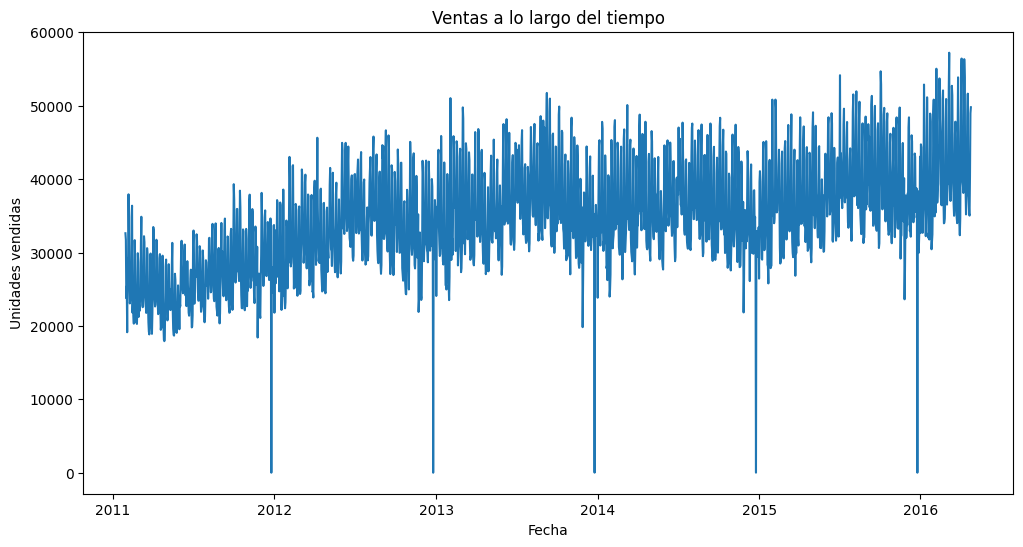

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='units', data=ventas_x_fecha)
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Unidades vendidas')
plt.show()

<Figure size 1200x800 with 0 Axes>

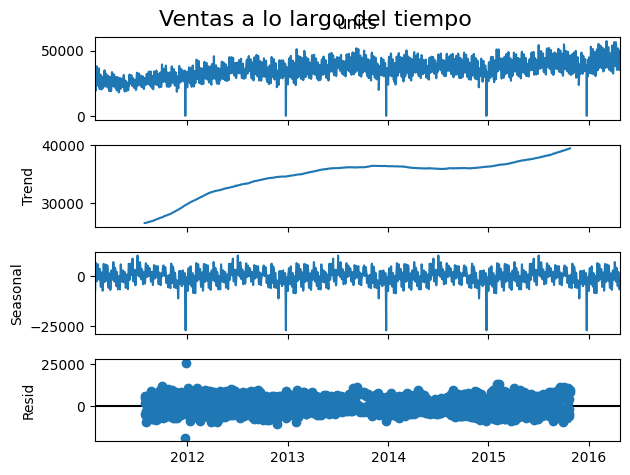

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

ventas_x_fecha.set_index('date', inplace=True)

decomp = seasonal_decompose(ventas_x_fecha['units'], model='additive', period=365)

plt.figure(figsize=(12, 8))
decomp.plot()
plt.suptitle('Ventas a lo largo del tiempo', fontsize=16)
plt.show()

In [15]:
#-- Comparacion de ventas entre las ciudades para determinar si hay diferencias significativas.
ventas_x_ciudad = df.groupby(['region', 'date'])['units'].sum().reset_index()

/var/folders/6r/9052dzp97n13nr25t57vnnf80000gn/T/ipykernel_18946/1157532426.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='units', data=ventas_x_ciudad, ci=None)


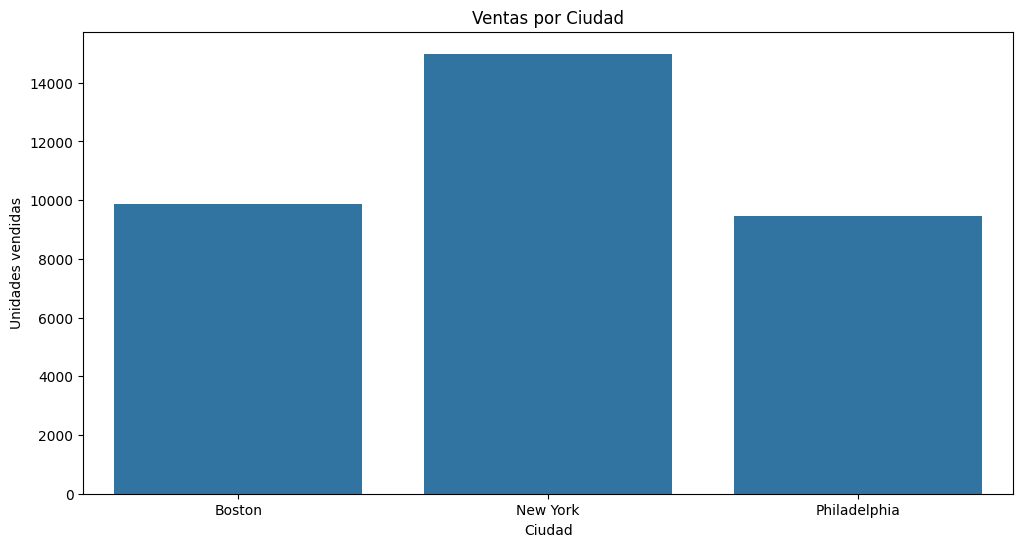

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='units', data=ventas_x_ciudad, ci=None)
plt.title('Ventas por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Unidades vendidas')
plt.show()

Existen diferencias significativas en las ventas entre las ciudades.


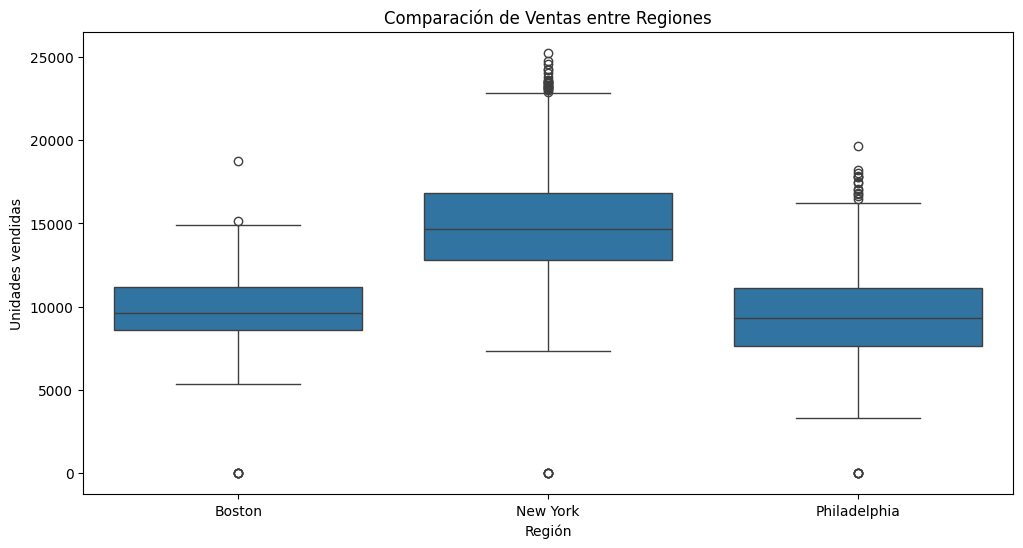

In [17]:
from scipy.stats import f_oneway

#agrupo las ventas por ciudad y calculo el total de ventas por ciudad
ventas_totales_ciudad = df.groupby('region')['units'].sum()

#test ANOVA
resultado_anova = f_oneway(*[ventas_x_ciudad[ventas_x_ciudad['region'] == ciudad]['units'] for ciudad in df['region'].unique()])

#ver si hay diferencias significativas
p_valor = resultado_anova.pvalue
nivel_significancia = 0.05

if p_valor < nivel_significancia:
    print("Existen diferencias significativas en las ventas entre las ciudades.")

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='region', y='units', data=ventas_x_ciudad)
    plt.title('Comparación de Ventas entre Regiones')
    plt.xlabel('Región')
    plt.ylabel('Unidades vendidas')
    plt.show()

else:
    print("No se encontraron diferencias significativas en las ventas entre las ciudades.")

/var/folders/6r/9052dzp97n13nr25t57vnnf80000gn/T/ipykernel_18946/2731790818.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='region', y='units', data=ventas_x_ciudad, ci='sd')  #barra de error representa la desviación estándar


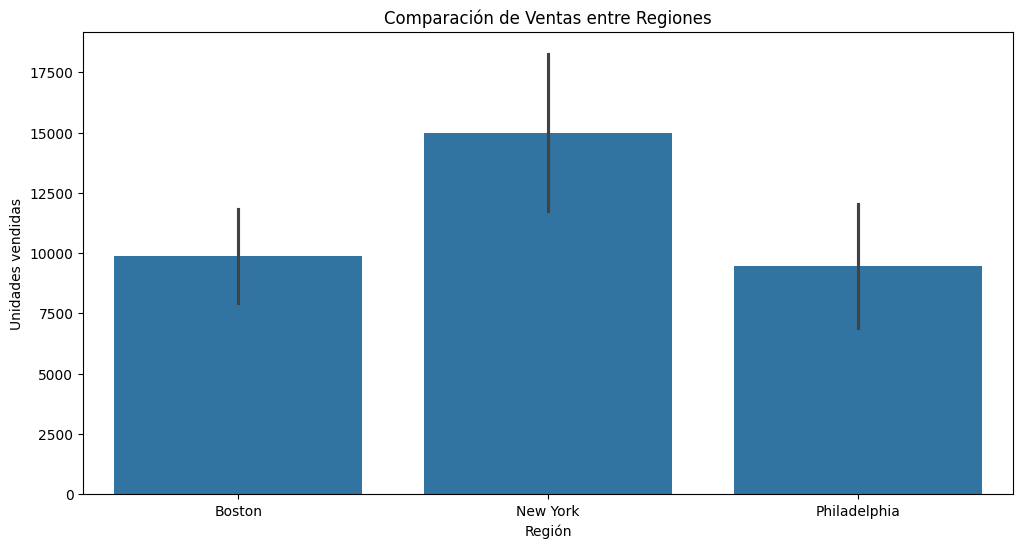

In [18]:
#otros graficos
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='units', data=ventas_x_ciudad, ci='sd')  #barra de error representa la desviación estándar
plt.title('Comparación de Ventas entre Regiones')
plt.xlabel('Región')
plt.ylabel('Unidades vendidas')
plt.show()

/var/folders/6r/9052dzp97n13nr25t57vnnf80000gn/T/ipykernel_18946/3213729411.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='units', data=ventas_x_ciudad, estimator='mean', ci=None, color='red')  #puntos representan ventas individuales, barra roja el promedio


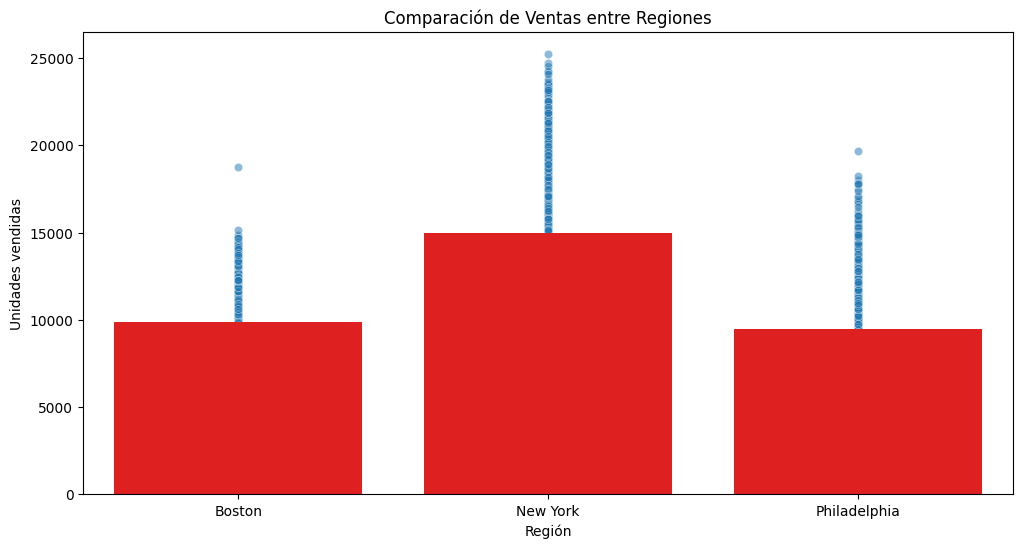

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='region', y='units', data=ventas_x_ciudad, alpha=0.5)
sns.barplot(x='region', y='units', data=ventas_x_ciudad, estimator='mean', ci=None, color='red')  #puntos representan ventas individuales, barra roja el promedio
plt.title('Comparación de Ventas entre Regiones')
plt.xlabel('Región')
plt.ylabel('Unidades vendidas')
plt.show()

In [20]:
#-- Examen popularidad de los productos e identificar los más vendidos por ciudad
ventas_ciudad_producto = df.groupby(['region', 'item'])['units'].sum().reset_index()

In [21]:
#-- Productos más vendidos en cada ciudad
prod_mas_vendidos = ventas_ciudad_producto.groupby('region').apply(lambda x: x.nlargest(5, 'units')).reset_index(drop=True)

/var/folders/6r/9052dzp97n13nr25t57vnnf80000gn/T/ipykernel_18946/4009639885.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prod_mas_vendidos = ventas_ciudad_producto.groupby('region').apply(lambda x: x.nlargest(5, 'units')).reset_index(drop=True)


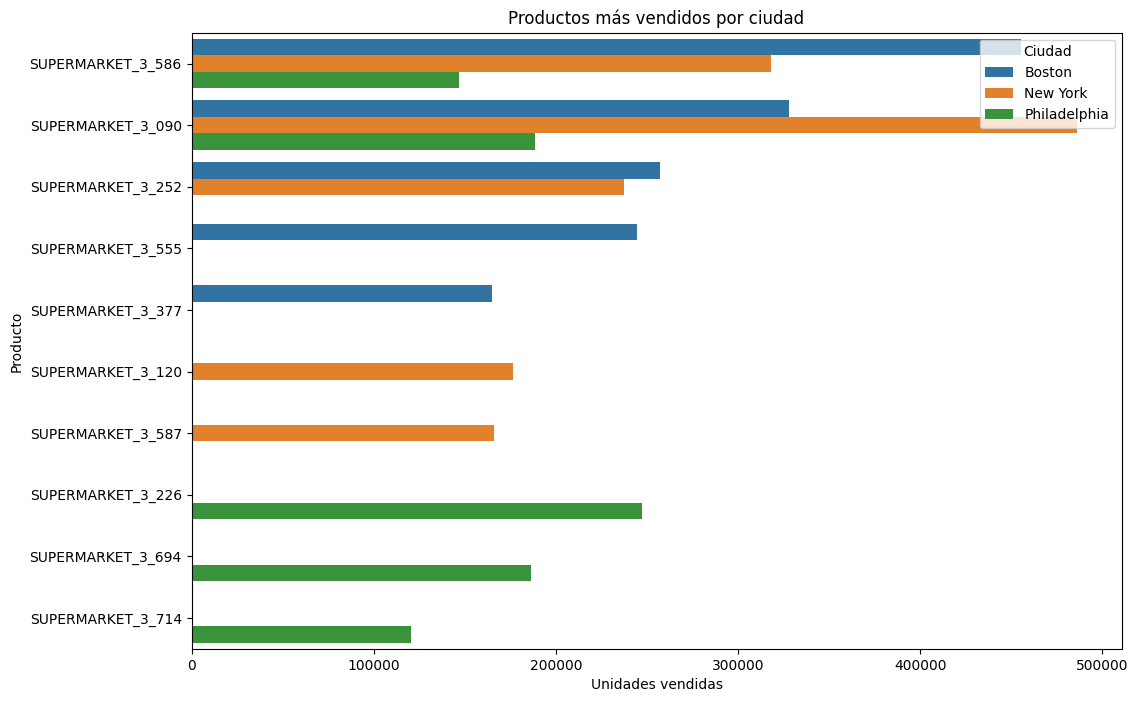

In [22]:
#grafico
plt.figure(figsize=(12, 8))
sns.barplot(x='units', y='item', hue='region', data=prod_mas_vendidos)
plt.title('Productos más vendidos por ciudad')
plt.xlabel('Unidades vendidas')
plt.ylabel('Producto')
plt.legend(title='Ciudad', loc='upper right')
plt.show()

In [23]:
#-- Analisis variaciones de precios entre tiendas y ciudades, determinar si hay alguna relación entre los precios y las ventas.
datos_ciudad_tienda = df.groupby(['region', 'store']).agg({'sell_price': 'mean', 'units': 'sum'}).reset_index()

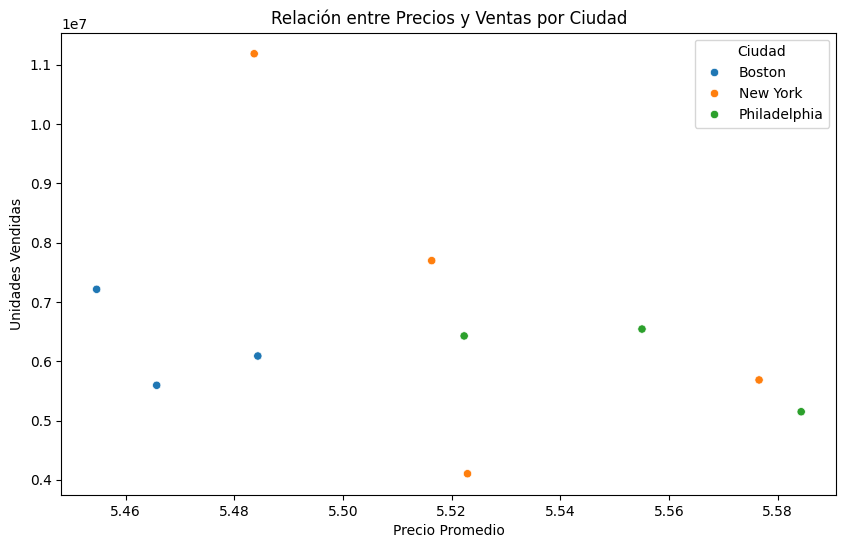

In [24]:
#grafico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sell_price', y='units', hue='region', data=datos_ciudad_tienda)
plt.title('Relación entre Precios y Ventas por Ciudad')
plt.xlabel('Precio Promedio')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Ciudad', loc='upper right')
plt.show()